[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Code Link: [Github](https://github.com/AutuanLiu/Kaggle-Compettions/tree/master/House%20Prices)

In [118]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [119]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [120]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.preprocessing import LabelEncoder
sns.set_style('whitegrid')
sns.set_palette('Set1')

## 1 导入数据

In [121]:
datadir = 'dataset/'

In [122]:
# read data from file
train_data = pd.read_csv(f'{datadir}train.csv')
test_data = pd.read_csv(f'{datadir}test.csv')

## 2 数据基本信息

In [123]:
train_data.head()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [124]:
train_data.describe()
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [125]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* 为了防止更改原始数据，这里复制数据

In [126]:
train_set = train_data.copy()
test_set = test_data.copy()
del train_data, test_data

* 数据清理时一起进行，所以将其合并

In [127]:
dataset = pd.concat([train_set, test_set], axis=0, sort=False)
dataset.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1136,2597,20,RL,NaN,7777,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,NaN
518,519,60,RL,NaN,9531,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,211000.0
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500.0
1415,1416,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,175900.0
152,1613,20,RL,NaN,11875,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN


* 查看空值信息

In [128]:
dataset.shape

(2919, 81)

In [129]:
a = dataset.isna().sum()
data_na = a[a > 0]
data_na

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

* 空值所占的比例

In [130]:
per = data_na/dataset.shape[0]
per

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
SalePrice       0.499829
dtype: float64

* 超过一半都是空值的列

In [131]:
col50 = per[per > 0.5]
col50

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

## 3 数据清洗

In [132]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3.1 分类变量

|var|define|
|---|---|
|MSSubClass| 待售房子类型、风格等|
|MSZoning|房子的用途、工业、农业等|
|Street|街道道路类型|
|Alley|小巷的道路类型，NA表示没有小巷|
|LotShape|房子的形状|
|LandContour|房子的平整度，坡道等|
|Utilities|公共设施的可使用情况|
|LotConfig|房子的配置|
|LandSlope|房子的倾斜程度|
|Neighborhood|城市范围内的位置|
|Condition1|房子的条件，临街、铁路等|
|Condition2|房子的条件，临街、铁路等，有多个|
|BldgType|建筑类型，独栋等|
|HouseStyle|住宅类型，一层还是一层半等|
|OverallQual|房子的整体评价与装修|
|OverallCond|整体评分|
|YearBuilt|建造时间|
|YearRemodAdd|重装时间，NA表示与建成时间相同|
|RoofStyle|屋顶样式|
|RoofMatl|屋顶材料|
|Exterior1st|房子的外墙材料类型|
|Exterior2nd|房子的外墙材料类型，超过一种|
|MasVnrType|砖的类型，None表示没有|
|ExterQual|外墙的材料质量等评分|
|ExterCond|外墙材料的评价|
|Foundation|基础条件的评价，砖、煤等|
|BsmtQual|地下室的高度，NA表示没有地下室|
|BsmtCond|地下室条件的评价|
|BsmtExposure|地下室墙壁情况|
|BsmtFinType1|已完工地下室等级，适合居住么|
|BsmtFinType2|已完工地下室类型2如果有多个的话|
|Heating|取热类型，煤等|
|HeatingQC|取热质量评价|
|CentralAir|有没有中央空调|
|Electrical|电力系统的类型|
|BsmtFullBath|地下室满浴室数量|
|BsmtHalfBath|地下室半浴室数量|
|FullBath|满浴室数量|
|HalfBath|半浴室数量|
|Bedroom|楼上我是数量|
|Kitchen|厨房数量|
|KitchenQual|厨房质量评价|
|TotRmsAbvGrd|房间数量，不包括浴室|
|Functional|房间的功能性|
|Fireplaces|壁炉的数量|
|FireplaceQu|炉的质量|
|GarageType|车库位置，NA表示没有|
|GarageYrBlt|车库建成时间|
|GarageFinish|车库装修情况|
|GarageCars|车库的容纳car数量|
|GarageQual|车库的质量评价|
|GarageCond|车库的条件评价|
|PavedDrive|铺设车道|
|PoolQC|游泳池质量评价，NA表示没有游泳池|
|Fence|栅栏质量， NA表示没有|
|MiscFeature|其他类别中未包含的杂项功能|
|MoSold|月销量|
|YrSold|年销量|
|SaleType|销售类型|
|SaleCondition|销售条件|

#### 3.1.1 第一组数据 
|var|define|
|---|---|
|MSSubClass| 待售房子类型、风格等|
|MSZoning|房子的用途、工业、农业等|
|Street|街道道路类型|
|Alley|小巷的道路类型，NA表示没有小巷|
|LotShape|房子的形状|

In [133]:
cat_label = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape']
dataset[cat_label].isna().sum()  # 不存在空值且为分类变量

MSSubClass       0
MSZoning         4
Street           0
Alley         2721
LotShape         0
dtype: int64

* 创造一个新的变量，表示是否有 Alley

In [134]:
dataset['isAlley'] = 1   # 初始化
dataset['isAlley'].loc[dataset['Alley'].isna()] = 0

d:\softwares\miniconda\envs\torch36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [135]:
dataset.loc[dataset.MSZoning.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isAlley
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN,0
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN,0
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN,0
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN,0


In [136]:
for label in cat_label:
    print(label)
    print(dataset[label].value_counts(), '\n-----')

MSSubClass
20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64 
-----
MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 
-----
Street
Pave    2907
Grvl      12
Name: Street, dtype: int64 
-----
Alley
Grvl    120
Pave     78
Name: Alley, dtype: int64 
-----
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64 
-----


* MSZoning 使用众数填充
* MSSubClass 暂时不用处理
* Alley 使用 None 填充

In [137]:
mode_v = dataset.MSZoning.mode().iloc[0]
dataset.MSZoning.fillna(mode_v, inplace=True)
dataset.Alley.fillna('None', inplace=True)

#### 3.1.2 第二组数据 
|var|define|
|---|---|
|LandContour|房子的平整度，坡道等|
|Utilities|公共设施的可使用情况|
|LotConfig|房子的配置|
|LandSlope|房子的倾斜程度|
|Neighborhood|城市范围内的位置|

In [138]:
def get_info(cat):
    print('空值信息')
    print(dataset[cat].isna().sum())
    for label in cat:
        print(label, ':')
        print(dataset[label].value_counts(), '\n-----')

In [139]:
cat1 = ['LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood']
get_info(cat1)

空值信息
LandContour     0
Utilities       2
LotConfig       0
LandSlope       0
Neighborhood    0
dtype: int64
LandContour :
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64 
-----
Utilities :
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64 
-----
LotConfig :
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64 
-----
LandSlope :
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64 
-----
Neighborhood :
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64 
-----


In [140]:
dataset.loc[dataset.Utilities.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isAlley
455,1916,30,RL,109.0,21780,Grvl,None,Reg,Lvl,NaN,...,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN,0
485,1946,20,RL,NaN,31220,Pave,None,IR1,Bnk,NaN,...,NaN,NaN,Shed,750,5,2008,WD,Normal,NaN,0


* 使用众数 AllPub 公共区域填充 Utilities 空值

In [141]:
dataset.Utilities.fillna('AllPub', inplace=True)

#### 3.1.3 第三组数据 
|var|define|
|---|---|
|Condition1|房子的条件，临街、铁路等|
|Condition2|房子的条件，临街、铁路等，有多个|
|BldgType|建筑类型，独栋等|
|HouseStyle|住宅类型，一层还是一层半等|
|OverallQual|房子的整体评价与装修|

In [142]:
cat2 = ['Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
get_info(cat2)

空值信息
Condition1     0
Condition2     0
BldgType       0
HouseStyle     0
OverallQual    0
dtype: int64
Condition1 :
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64 
-----
Condition2 :
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64 
-----
BldgType :
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64 
-----
HouseStyle :
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64 
-----
OverallQual :
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64 
-----


* 这里不涉及空值的问题
* Condition1 和 Condition2 要单独处理
* 增加变量n_condition表示具备条件的数量（把Norm当做一种条件）

In [143]:
dataset['n_condition'] = 1 # 初始化
dataset['n_condition'].loc[dataset['Condition2'] != 'Norm'] += 1
dataset['n_condition'].head(10)

d:\softwares\miniconda\envs\torch36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    2
Name: n_condition, dtype: int64

#### 3.1.4 第四组数据 
|var|define|
|---|---|
|OverallCond|整体评分|
|YearBuilt|建造时间|
|YearRemodAdd|重装时间，NA表示与建成时间相同|
|RoofStyle|屋顶样式|
|RoofMatl|屋顶材料|

In [144]:
cat4 = ['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl']
get_info(cat4)

空值信息
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
dtype: int64
OverallCond :
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64 
-----
YearBuilt :
2005    142
2006    138
2007    109
2004     99
2003     88
1977     57
1920     57
1976     54
1999     52
2008     49
1958     48
2000     48
2002     47
1998     46
1968     45
1959     43
1954     43
1910     43
1970     42
1967     41
1972     40
1956     39
1971     39
1978     39
1993     39
1950     38
1994     37
1960     37
1940     36
1966     35
       ... 
1982      7
1931      7
1985      7
1942      6
1912      5
1919      5
1932      5
1880      5
1934      5
2010      3
1905      3
1895      3
1917      3
1908      2
1885      2
1901      2
1892      2
1882      1
1896      1
1898      1
1902      1
1907      1
1904      1
1906      1
1913      1
1911      1
1875      1
1879      1
1893      1
1872      1
Name:

* 这组数据不存在空值
* 关键在于处理年份信息

In [145]:
dataset.YearBuilt.dtype

dtype('int64')

* 增加建造到重建之间的年限 re_years

In [146]:
dataset['re_years'] = dataset.YearRemodAdd - dataset.YearBuilt

* 增加是否重建的变量 is_rebuild

In [147]:
dataset['is_rebuild'] = 1
dataset['is_rebuild'].loc[dataset['re_years'] == 0] = 0

d:\softwares\miniconda\envs\torch36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [148]:
dataset['re_years'].sample(5)
dataset['is_rebuild'].sample(5)

1432    80
968     40
188      0
1342     0
272      8
Name: re_years, dtype: int64

1031    1
481     0
382     0
1432    1
548     0
Name: is_rebuild, dtype: int64

* 将建造年份\重建年份更改为分类数据

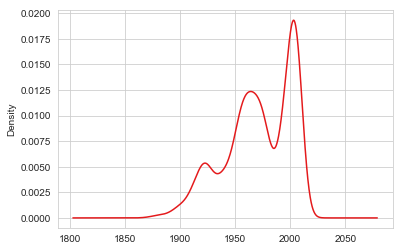

In [149]:
dataset['YearBuilt'].plot(kind='kde')

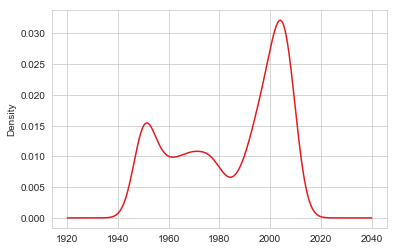

In [150]:
dataset['YearRemodAdd'].plot(kind='kde')

In [151]:
dataset['YearBuiltbin'] = pd.qcut(dataset['YearBuilt'], 4)
dataset['YearRemodAddbin'] = pd.qcut(dataset['YearRemodAdd'], 4)
dataset['YearBuiltbin'].sample(10)
dataset['YearRemodAddbin'].sample(10)

950     (1871.999, 1953.5]
924       (1953.5, 1973.0]
782       (1973.0, 2001.0]
1130    (1871.999, 1953.5]
1432    (1871.999, 1953.5]
759       (1973.0, 2001.0]
647       (1953.5, 1973.0]
108     (1871.999, 1953.5]
549       (2001.0, 2010.0]
1157      (1953.5, 1973.0]
Name: YearBuiltbin, dtype: category
Categories (4, interval[float64]): [(1871.999, 1953.5] < (1953.5, 1973.0] < (1973.0, 2001.0] < (2001.0, 2010.0]]

1309      (1965.0, 1993.0]
378       (1993.0, 2004.0]
382       (1965.0, 1993.0]
994       (1993.0, 2004.0]
380     (1949.999, 1965.0]
122       (1993.0, 2004.0]
1298    (1949.999, 1965.0]
498       (1965.0, 1993.0]
1336    (1949.999, 1965.0]
489       (1965.0, 1993.0]
Name: YearRemodAddbin, dtype: category
Categories (4, interval[float64]): [(1949.999, 1965.0] < (1965.0, 1993.0] < (1993.0, 2004.0] < (2004.0, 2010.0]]

* 删除原始label列

In [152]:
dataset.drop(labels=['YearRemodAdd', 'YearBuilt'], axis=1, inplace=True)

#### 3.1.5 第五组数据 
|var|define|
|---|---|
|Exterior1st|房子的外墙材料类型|
|Exterior2nd|房子的外墙材料类型，超过一种|
|MasVnrType|砖的类型，None表示没有|
|ExterQual|外墙的材料质量等评分|
|ExterCond|外墙材料的评价|

In [153]:
cat5 = ['Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond']
get_info(cat5)

空值信息
Exterior1st     1
Exterior2nd     1
MasVnrType     24
ExterQual       0
ExterCond       0
dtype: int64
Exterior1st :
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64 
-----
Exterior2nd :
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64 
-----
MasVnrType :
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64 
-----
ExterQual :
TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64 
-----
ExterCond :
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond

* 使用众数VinylSd填充Exterior1st
* 使用Exterior1st的值填充Exterior2nd
* 使用 'None' 填充MasVnrType表示没有

In [154]:
dataset.Exterior1st.fillna('VinylSd', inplace=True)
idx = dataset[dataset.Exterior2nd.isna()].index[0]
dataset.Exterior2nd.fillna(dataset.Exterior1st.iloc[idx], inplace=True)
dataset.MasVnrType.fillna('None', inplace=True)

* 创建新的变量表示外墙使用了多少种材料

In [155]:
dataset.loc[:, ['Exterior1st', 'Exterior2nd']].sample(10)

,Exterior1st,Exterior2nd
62,MetalSd,MetalSd
765,VinylSd,VinylSd
1258,Plywood,Plywood
836,VinylSd,VinylSd
1391,Plywood,Plywood
964,Wd Sdng,MetalSd
1095,VinylSd,VinylSd
8,HdBoard,HdBoard
283,VinylSd,VinylSd
1163,VinylSd,VinylSd


In [156]:
dataset['n_Exterior'] = 1
dataset['n_Exterior'].loc[dataset['Exterior2nd'] != dataset['Exterior1st']] += 1

d:\softwares\miniconda\envs\torch36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [157]:
dataset['n_Exterior'].sample(10)

1282    1
260     1
297     1
450     1
364     1
626     2
737     2
505     1
1429    1
1170    1
Name: n_Exterior, dtype: int64

#### 3.1.6 第六组数据 
|var|define|
|---|---|
|Foundation|基础条件的评价，砖、煤等|
|BsmtQual|地下室的高度，NA表示没有地下室|
|BsmtCond|地下室条件的评价|
|BsmtExposure|地下室墙壁情况|
|BsmtFinType1|已完工地下室等级，适合居住么|

In [158]:
cat6 = ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']
get_info(cat6)

空值信息
Foundation       0
BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
dtype: int64
Foundation :
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64 
-----
BsmtQual :
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64 
-----
BsmtCond :
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64 
-----
BsmtExposure :
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64 
-----
BsmtFinType1 :
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64 
-----


* 使用 'None'填充BsmtQual, BsmtCond, BsmtFinType1, BsmtExposure表示没有
* 创造has_Exposure变量表示墙壁接触
* 创造has_finshed1变量表示有没有完工地下室1
* 有没有地下室存在差异，使用81
* 有没有地下室 1 has_Bsmt1

In [161]:
label = ['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure']
def fill_None(label):
    for v in label:
        dataset[v].fillna('None', inplace=True)
fill_None(label)

In [162]:
dataset['has_Exposure'] = 1
dataset['has_Exposure'].loc[dataset['BsmtExposure'] == 'No'] = 0
dataset['has_finshed1'] = 1
dataset['has_finshed1'].loc[dataset['BsmtFinType1'] == 'Unf'] = 0
dataset['has_Bsmt1'] = 1
dataset['has_Bsmt1'].loc[dataset['BsmtFinType1'] == 'None'] = 0

d:\softwares\miniconda\envs\torch36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [163]:
dataset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,isAlley,n_condition,re_years,is_rebuild,YearBuiltbin,YearRemodAddbin,n_Exterior,has_Exposure,has_finshed1,has_Bsmt1
152,1613,20,RL,NaN,11875,Pave,None,Reg,Lvl,AllPub,...,0,1,0,0,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,0,0,1
794,795,60,RL,NaN,10832,Pave,None,IR1,Lvl,AllPub,...,0,1,2,1,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,0,0,1
327,1788,30,RL,90.0,5400,Pave,None,Reg,Lvl,AllPub,...,0,1,10,1,"(1871.999, 1953.5]","(1949.999, 1965.0]",1,0,0,1
238,1699,20,RL,NaN,10750,Pave,None,IR1,Lvl,AllPub,...,0,1,1,1,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,1,1,1
563,564,50,RL,66.0,21780,Pave,None,Reg,Lvl,AllPub,...,0,1,32,1,"(1871.999, 1953.5]","(1949.999, 1965.0]",1,1,0,1
739,740,60,RL,65.0,9313,Pave,None,IR1,Lvl,AllPub,...,0,1,0,0,"(2001.0, 2010.0]","(1993.0, 2004.0]",1,0,0,1
253,254,80,RL,85.0,9350,Pave,None,Reg,Lvl,AllPub,...,0,1,27,1,"(1953.5, 1973.0]","(1965.0, 1993.0]",1,1,1,1
540,541,20,RL,85.0,14601,Pave,None,Reg,Lvl,AllPub,...,0,1,0,0,"(2001.0, 2010.0]","(2004.0, 2010.0]",1,1,1,1
964,965,60,RL,80.0,11316,Pave,None,Reg,Lvl,AllPub,...,0,1,1,1,"(2001.0, 2010.0]","(1993.0, 2004.0]",1,0,1,1
775,776,120,RM,32.0,4500,Pave,None,Reg,Lvl,AllPub,...,0,1,0,0,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,0,1,1


#### 3.1.7 第七组数据 
|var|define|
|---|---|
|BsmtFinType2|已完工地下室类型2如果有多个的话|
|Heating|取热类型，煤等|
|HeatingQC|取热质量评价|
|CentralAir|有没有中央空调|
|Electrical|电力系统的类型|

In [164]:
cat7 = ['BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
get_info(cat7)

空值信息
BsmtFinType2    80
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
dtype: int64
BsmtFinType2 :
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64 
-----
Heating :
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64 
-----
HeatingQC :
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64 
-----
CentralAir :
Y    2723
N     196
Name: CentralAir, dtype: int64 
-----
Electrical :
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64 
-----


* 使用众数'SBrkr'填充Electrical
* 使用 'None'填充BsmtFinType2表示没有
* 新变量n_Bsmt表示地下室个数
* 新变量 has_Bsmt2 表示有没有地下室2
* 创造has_finshed2变量表示有没有完工地下室2
* 删除 has_Bsmt1 and has_Bsmt2

In [165]:
dataset.loc[dataset.BsmtFinType1.isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2


In [166]:
dataset.Electrical.fillna('SBrkr', inplace=True)
dataset.BsmtFinType2.fillna('None', inplace=True)
dataset['has_finshed2'] = 1
dataset['has_finshed2'].loc[dataset['BsmtFinType1'] == 'Unf'] = 0
dataset['has_Bsmt2'] = 1
dataset['has_Bsmt2'].loc[dataset['BsmtFinType2'] == 'None'] = 0
dataset['n_Bsmt'] = dataset['has_Bsmt1'] + dataset['has_Bsmt2']
dataset.drop(['has_Bsmt1', 'has_Bsmt2'], axis=1, inplace=True)

d:\softwares\miniconda\envs\torch36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### 3.1.8 第八组数据 
|var|define|
|---|---|
|BsmtFullBath|地下室满浴室数量|
|BsmtHalfBath|地下室半浴室数量|
|FullBath|满浴室数量|
|HalfBath|半浴室数量|
|Bedroom|楼上我是数量|

In [168]:
dataset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,n_condition,re_years,is_rebuild,YearBuiltbin,YearRemodAddbin,n_Exterior,has_Exposure,has_finshed1,has_finshed2,n_Bsmt
641,642,60,FV,NaN,7050,Pave,None,Reg,Lvl,AllPub,...,1,0,0,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,0,1,1,2
223,1684,60,RL,63.0,10928,Pave,None,Reg,Lvl,AllPub,...,1,0,0,"(2001.0, 2010.0]","(2004.0, 2010.0]",1,0,0,0,2
848,849,50,RL,75.0,45600,Pave,None,IR2,Bnk,AllPub,...,1,89,1,"(1871.999, 1953.5]","(1993.0, 2004.0]",1,0,0,0,2
1082,2543,85,RL,75.0,9825,Pave,None,Reg,Low,AllPub,...,1,0,0,"(1953.5, 1973.0]","(1965.0, 1993.0]",1,1,1,1,2
511,1972,60,RL,102.0,12151,Pave,None,IR1,Lvl,AllPub,...,1,0,0,"(2001.0, 2010.0]","(2004.0, 2010.0]",2,1,1,1,2
473,1934,60,RL,72.0,8702,Pave,None,IR1,Lvl,AllPub,...,1,1,1,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,0,1,1,2
1085,1086,85,RL,73.0,9069,Pave,None,Reg,Lvl,AllPub,...,1,0,0,"(1973.0, 2001.0]","(1965.0, 1993.0]",1,1,1,1,2
1125,1126,20,RL,60.0,10434,Pave,None,Reg,Lvl,AllPub,...,1,0,0,"(1953.5, 1973.0]","(1949.999, 1965.0]",1,0,0,0,2
179,180,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,...,1,83,1,"(1871.999, 1953.5]","(2004.0, 2010.0]",1,0,0,0,2
1058,2519,60,RL,47.0,10820,Pave,None,IR2,Lvl,AllPub,...,1,0,0,"(1973.0, 2001.0]","(1993.0, 2004.0]",1,1,1,1,2


#### 3.1.9 第九组数据 
|var|define|
|---|---|
|Kitchen|厨房数量|
|KitchenQual|厨房质量评价|
|TotRmsAbvGrd|房间数量，不包括浴室|
|Functional|房间的功能性|
|Fireplaces|壁炉的数量|

#### 3.1.10 第十组数据 
|var|define|
|---|---|
|FireplaceQu|炉的质量|
|GarageType|车库位置，NA表示没有|
|GarageYrBlt|车库建成时间|
|GarageFinish|车库装修情况|
|GarageCars|车库的容纳car数量|

#### 3.1.11 第十一组数据 
|var|define|
|---|---|
|GarageQual|车库的质量评价|
|GarageCond|车库的条件评价|
|PavedDrive|铺设车道|
|PoolQC|游泳池质量评价，NA表示没有游泳池|
|Fence|栅栏质量， NA表示没有|

#### 3.1.12 第十二组数据 
|var|define|
|---|---|
|MiscFeature|其他类别中未包含的杂项功能|
|MoSold|月销量|
|YrSold|年销量|
|SaleType|销售类型|
|SaleCondition|销售条件|

In [167]:
cat1 = ['LandContour', 'Utilities']

### 3.2 连续变量

|var|define|
|---|---|
|LotFrontage|距离街道的距离|
|LotArea|地段面积|
|MasVnrArea|砖砌的面积|
|BsmtFinSF1|已完工地下室面积，NA表示没有地下室|
|BsmtFinSF2|已完工地下室面积，多个|
|BsmtUnfSF|未完工的地下室面积|
|TotalBsmtSF|地下室总面积|
|1stFlrSF|一楼的面积|
|2ndFlrSF|二楼的面积|
|LowQualFinSF|低质量的房屋面积|
|GrLivArea|地面以上居住面积|
|GarageArea|车库面积|
|WoodDeckSF|木质甲板面积|
|OpenPorchSF|开放式门廊的面积|
|EnclosedPorch|封闭式门廊面积|
|3SsnPorch|三季门廊面积|
|ScreenPorch|屏风廊面积|
|PoolArea|泳池面积|
|MiscVal|杂项功能的价值|

## 4 异常值检测